In [2]:
import sys
sys.path.append('..')
from src.data_loader import download_stock_data, get_data_info
from src.strategy import calculate_sma, generate_signals

#other esssential libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14,7)


In [3]:
ticker = 'RELIANCE.NS'
print(f" downloading {ticker} stock data...")
df = download_stock_data(ticker, period="5y", interval ="1d")


 downloading RELIANCE.NS stock data...


Succesfully downloaded 1239 rows of data

Date range: 2021-01-21 to 2026-01-21


In [4]:
get_data_info(df)


Data Information
Total rows:1239
Date range: 2021-01-21 to 2026-01-21

 columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

 Missing values: Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
                                 Open        High         Low       Close  \
Date                                                                        
2021-01-21 00:00:00+05:30  944.043896  961.274278  940.869907  951.933594   
2021-01-22 00:00:00+05:30  957.193372  959.165841  922.800612  929.352722   
2021-01-25 00:00:00+05:30  922.709977  922.709977  876.029221  880.110107   
2021-01-27 00:00:00+05:30  872.855233  872.855233  856.078269  859.252258   
2021-01-28 00:00:00+05:30  852.518866  872.084466  847.916557  850.886536   

                             Volume  Dividends  Stock Splits  
Date                                                          
2021-01-21 00:00:00+05:

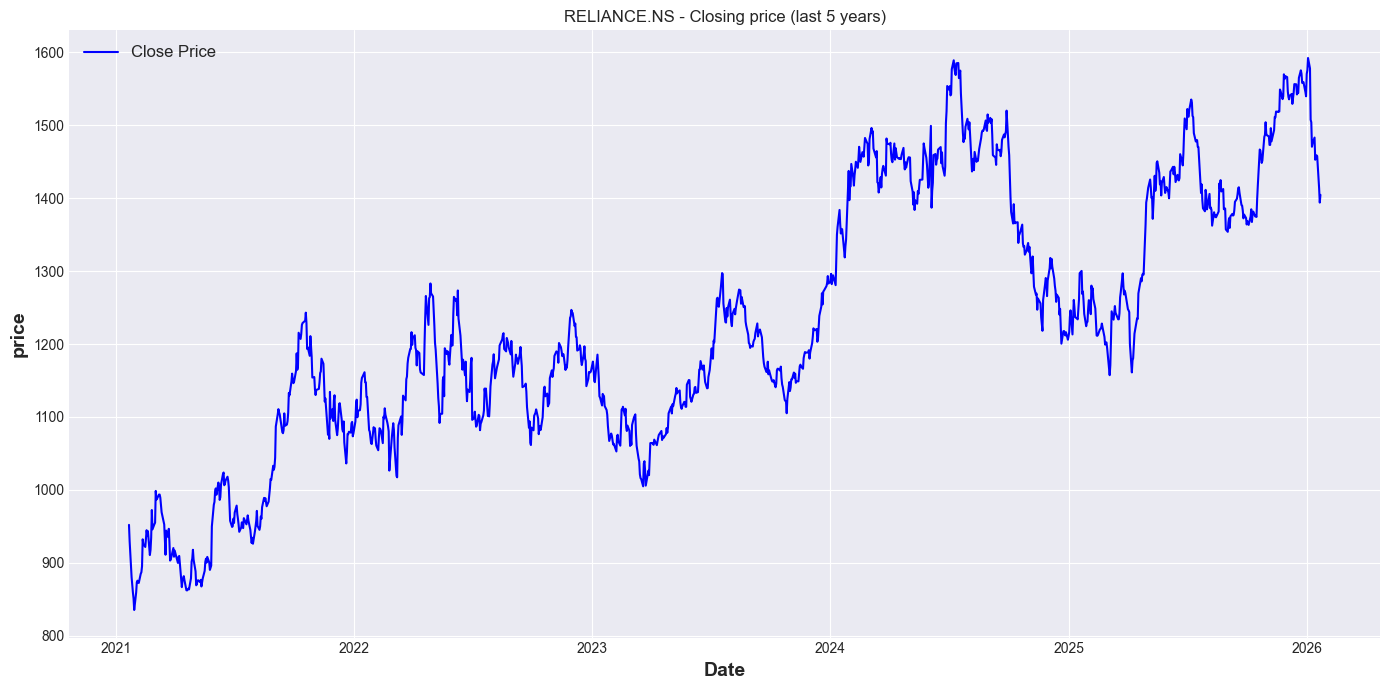

In [5]:
plt.plot(df.index, df['Close'], label = 'Close Price', color = 'blue', linewidth = '1.5')
plt.title(f"{ticker} - Closing price (last 5 years)")
plt.xlabel("Date", fontsize = 14, fontweight = 'bold')
plt.ylabel("price", fontsize = 14, fontweight = 'bold')
plt.legend(fontsize = 12)
plt.tight_layout()
plt.grid(True)
plt.show()

In [6]:
df_SMA = calculate_sma(df, short_window=20, long_window=50)
df_SMA[['Close','SMA_20', 'SMA_50']].tail(10)

Calculated SMA 20 and SMA 50


,Close,SMA_20,SMA_50
Date,,,
2026-01-08 00:00:00+05:30,1470.599976,1550.739990,1534.812000
2026-01-09 00:00:00+05:30,1475.300049,1546.679993,1534.590000
2026-01-12 00:00:00+05:30,1483.199951,1543.029993,1534.560000
2026-01-13 00:00:00+05:30,1452.800049,1538.554993,1534.154001
2026-01-14 00:00:00+05:30,1458.800049,1534.274994,1533.868003
2026-01-15 00:00:00+05:30,1458.800049,1529.994995,1533.122004
2026-01-16 00:00:00+05:30,1457.900024,1524.634998,1532.720005
2026-01-19 00:00:00+05:30,1413.599976,1516.544995,1531.206003
2026-01-20 00:00:00+05:30,1394.000000,1507.709998,1529.218003


In [7]:
df_signals = generate_signals(df_SMA)

df_signals[['Close','SMA_20','SMA_50','Position','Signal']].tail(10)

Buy signals:16
Sell signals:16


,Close,SMA_20,SMA_50,Position,Signal
Date,,,,,
2026-01-08 00:00:00+05:30,1470.599976,1550.739990,1534.812000,1,0.0
2026-01-09 00:00:00+05:30,1475.300049,1546.679993,1534.590000,1,0.0
2026-01-12 00:00:00+05:30,1483.199951,1543.029993,1534.560000,1,0.0
2026-01-13 00:00:00+05:30,1452.800049,1538.554993,1534.154001,1,0.0
2026-01-14 00:00:00+05:30,1458.800049,1534.274994,1533.868003,1,0.0
2026-01-15 00:00:00+05:30,1458.800049,1529.994995,1533.122004,0,-1.0
2026-01-16 00:00:00+05:30,1457.900024,1524.634998,1532.720005,0,0.0
2026-01-19 00:00:00+05:30,1413.599976,1516.544995,1531.206003,0,0.0
2026-01-20 00:00:00+05:30,1394.000000,1507.709998,1529.218003,0,0.0


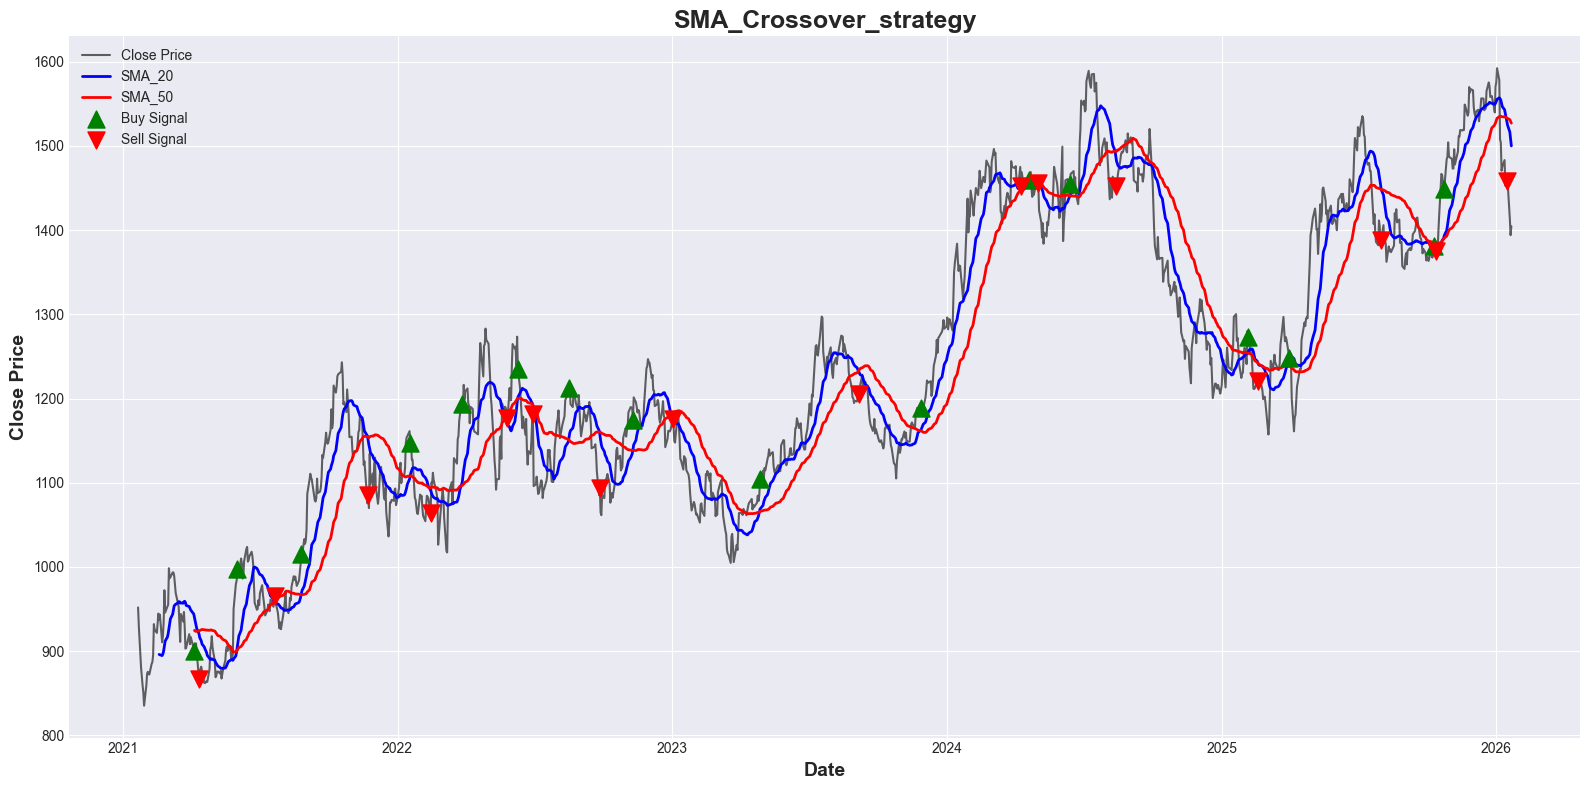

In [19]:
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(df_signals.index, df_signals['Close'], label = "Close Price", color = 'black', linewidth = 1.5, alpha = 0.6)
ax.plot(df_signals.index, df_signals['SMA_20'], label = "SMA_20", color = 'blue', linewidth = 2)
ax.plot(df_signals.index, df_signals['SMA_50'], label = "SMA_50", color = 'red', linewidth = 2)
buy_signals = df_signals[df_signals['Signal'] == 1]
ax.scatter(buy_signals.index, buy_signals['Close'], marker ="^",color = 'green',s =150, zorder = 5, label ='Buy Signal')
sell_signals = df_signals[df_signals['Signal']==-1]
ax.scatter(sell_signals.index, sell_signals['Close'], marker = "v", color ='red',s=150, zorder = 5, label='Sell Signal')
ax.set_title("SMA_Crossover_strategy", fontsize = 18, fontweight = 'bold')
ax.legend(loc = 'best')
ax.set_xlabel("Date", fontsize = 14, fontweight = "bold")
ax.set_ylabel("Close Price", fontsize = 14, fontweight = 'bold')
fig.tight_layout()
plt.show()
